# Week 05 Exercises
### 5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to ```data/Justice_Equity_Need_Index.geojson```

Let's start doing some spatial analysis.

1. Load the JENI dataset and view the first few rows. You will notice a column ```sup_dist``` which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean ```jenipctl```. 
2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean ```jenipctl```
3. Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the ```jenipctl``` means.


In [3]:
# Import libraries
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from shapely.geometry import box,Point, LineString, Polygon
import geopandas as gpd


In [5]:
jeni_data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')
jeni_data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [6]:
# Select columns of interest
jeni_data_selection = jeni_data[['sup_dist','jenipctl','geometry']]

# Dissolve and find mean
jeni_data_dissolved = jeni_data_selection.dissolve(by='sup_dist', aggfunc='mean')
jeni_data_dissolved

,geometry,jenipctl
sup_dist,,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833...",60.502222
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8...",65.157143
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0...",38.586667
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725...",51.292857
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1...",41.464286


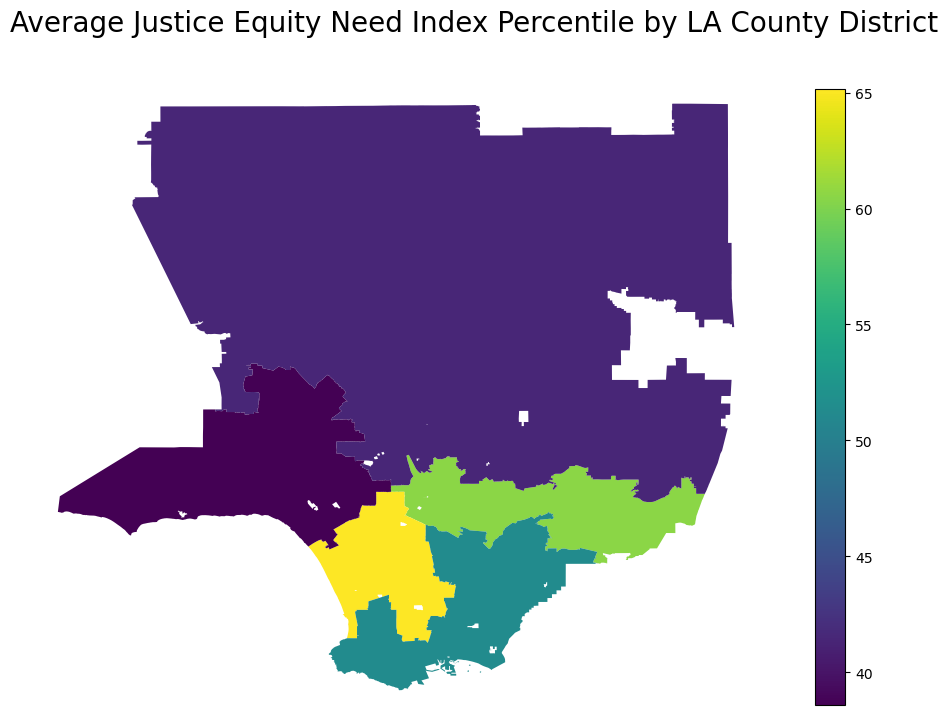

In [14]:
fig, (ax1) = plt.subplots(figsize=(12, 8))

jeni_data_dissolved.reset_index().plot(column='jenipctl', legend=True, ax=ax1)

plt.suptitle('Average Justice Equity Need Index Percentile by LA County District', fontsize=20)
leg = ax1.get_legend()
ax1.set_axis_off()
plt.axis('equal')
plt.show()

In [8]:
print('some meaningful caption')

some meaningful caption


### 5.2 Spatial Joining
Let's use the same ```data/Justice_Equity_Need_Index.geojson``` and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: ```data/LB_City_Boundary.geojson``` and the second is Long Beach neighborhoods: ```data/LB_Neighborhoods.geojson```

1. Clip the original ```data/Justice_Equity_Need_Index.geojson``` by the city of Long Beach boundary. What should you always first check before working with multiple datasets?
2. Using the clipped version of the JENI dataset, spatially join the ```data/LB_Neighborhoods.geojson``` and your clipped dataset. 
3. Make a map that has different color categories for each Long Beach neighborhood by the ```jenipctl```.
4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods ```jenipctl``` rankings. 


In [11]:
# Read in datasets check CRS of all

#Read in the new data sets
lb_city = gpd.read_file('data/LB_City_Boundary.geojson')
lb_neighborhoods = gpd.read_file('data/LB_Neighborhoods.geojson')

print(lb_city.crs)
print(lb_neighborhoods.crs)
print(jeni_data.crs)

epsg:4326
epsg:4326
epsg:4326


all CRS are the same can proceed

In [13]:
# clip
jeni_lb = gpd.clip(jeni_data,lb_city)

# spatially join
jeni_lb_neighborhoods = gpd.sjoin(jeni_lb,lb_neighborhoods)
jeni_lb_neighborhoods.head()

/Users/brpagan/anaconda3/envs/traillop/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,OBJECTID_left,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,...,index_right,OBJECTID_right,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length_right,SHAPE_Area_right
99,100,90803,Low,35.5,179,High,67.699997,Low,30.1,Low,...,120,121,Unassigned (Entrance Channel),{60ACC1CD-07A1-41AE-B3F3-EC9F37004683},None,NaT,None,NaT,0.009329,0.000005
99,100,90803,Low,35.5,179,High,67.699997,Low,30.1,Low,...,92,93,Peninsula,{C7769C49-526B-486B-AAE7-2313A333FE92},None,NaT,None,NaT,0.043964,0.000048
99,100,90803,Low,35.5,179,High,67.699997,Low,30.1,Low,...,97,98,Unassigned (Alamitos Bay Marina),{070E5177-6B37-4A16-BB0B-2C32BD5C84FF},None,NaT,MEMCNER,2022-07-28 17:37:55+00:00,0.052854,0.000019
99,100,90803,Low,35.5,179,High,67.699997,Low,30.1,Low,...,99,100,Unassigned (Alamitos Bay),{530C569A-F0C3-4BD8-AFC9-4381D010D612},None,NaT,None,NaT,0.104468,0.000095
99,100,90803,Low,35.5,179,High,67.699997,Low,30.1,Low,...,95,96,Unassigned (Los Cerritos Wetlands),{51C34E73-E26C-4BA9-A3E7-1879D33D0570},None,NaT,None,NaT,0.034938,0.000023


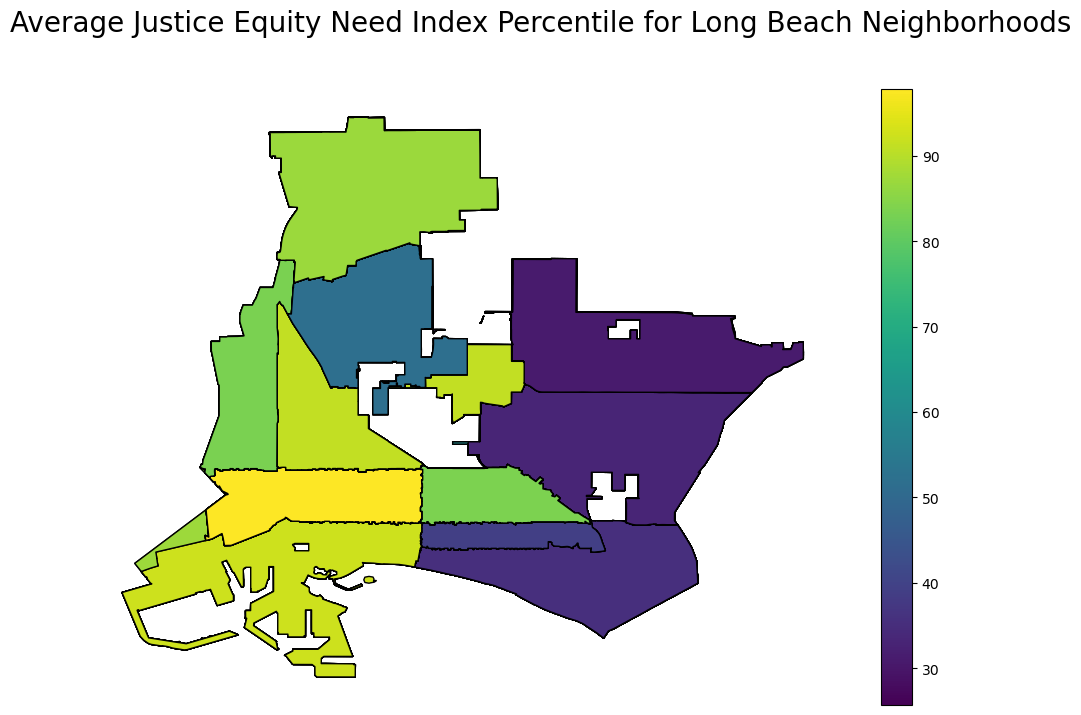

In [15]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

jeni_lb_neighborhoods.plot(column='jenipctl', edgecolor="black", ax=ax, legend=True)

plt.suptitle('Average Justice Equity Need Index Percentile for Long Beach Neighborhoods', fontsize=20)
leg = ax.get_legend()
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [16]:
print('some meaningful caption')

some meaningful caption


### 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

1. The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the ```zip``` and ``` csa ``` columns. 
2. Create the point for LMU's campus assuming the CRS to be ```epsg:4326```. Reproject this point to ```epsg:3857```.
3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?
4. Using the following function, calculate the distance from the LMU campus to each zip code. 
5. What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

In [25]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [21]:
# select only target columns
jeni_data_zips = jeni_data[['zip','csa','geometry']]
jeni_data_zips.head()

,zip,csa,geometry
0,91108,City of San Marino,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,91361,City of Westlake Village,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [22]:
# create dataframe of LMU
lmu_lon = -118.4170
lmu_lat = 33.9710

lmu_gdf = gpd.GeoDataFrame([[Point(lmu_lon, lmu_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])

/Users/brpagan/anaconda3/envs/traillop/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [23]:
# get centroids for jeni dataset, will get an error because jeni_data is 4326, need projected CRS, reproject below
jeni_data_zips.centroid


/var/folders/6f/styv5_3s4vz2g80lbzd67b8m0000gq/T/ipykernel_30765/2966468526.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  jeni_data_zips.centroid


0      POINT (-118.11364 34.12237)
1      POINT (-117.95078 33.95981)
2      POINT (-118.36846 33.77734)
3      POINT (-118.83252 34.13044)
4      POINT (-118.36413 33.75576)
                  ...             
276    POINT (-118.28745 34.00308)
277    POINT (-118.27400 33.92033)
278    POINT (-118.24959 33.92567)
279    POINT (-118.25179 34.04302)
280    POINT (-118.23915 34.02903)
Length: 281, dtype: geometry

In [24]:
# reproject and find centroids:
jeni_data_zips_reproject = jeni_data_zips.to_crs(3857)
jeni_data_zips_reproject['centroids']=jeni_data_zips_reproject.centroid

# LMU data needs to be reprojected as well to 3857
lmu_gdf_reprojected = lmu_gdf.to_crs(epsg=3857)


In [26]:
# now calculate distances
jeni_distances = jeni_data_zips_reproject.apply(calculate_distance, dest_geom=lmu_gdf_reprojected.loc[0,'geometry'], src_col='centroids', target_col='distance_to_LMU_km', axis=1)
jeni_distances.head()

,zip,csa,geometry,centroids,distance_to_LMU_km
0,91108,City of San Marino,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.833923832 4045245.069634101),39.420827
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.944533583 4023406.4038682887),51.920935
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.971354637 3998944.0343741723),26.520898
3,91361,City of Westlake Village,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469475659 4046330.2225167807),50.974867
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.603574097 3996054.497534471),29.448336


In [30]:
# calculate max distance and zip code associated
max_dist = jeni_distances['distance_to_LMU_km'].max()
idx_max_dist = jeni_distances['distance_to_LMU_km'].idxmax()

print('The maximum distance from the LMU campus is',max_dist,'km.')
print('The zip code of the maximum distance from the LMU campus is',jeni_distances['zip'][idx_max_dist])

# calculate and print the average distance to the LMU campus
print('The average distance to the LMU campus is', jeni_distances['distance_to_LMU_km'].mean(),'km.')

The maximum distance from the LMU campus is 116.8115519709202 km.
The zip code of the maximum distance from the LMU campus is 93535
The average distance to the LMU campus is 35.3095243272932 km.
